# Importing the Data and Library

In [1]:
import os

# Data analytics libraries
import numpy as np
import pandas as pd
import missingno as msno
import statsmodels.api as sm
import pydotplus, graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

# ML Libraries
from sklearn.metrics import precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
# from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")


# import dataset
credit_df = pd.read_csv("credit bureau data.csv")

In [2]:
# display credit bureau data
credit_df.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [3]:
# check shape of data sets
print("Credit Card Data", credit_df.shape)

Credit Card Data (71295, 19)


# Describe data

In [4]:
# lets check the dataset for numeric variables
credit_df.describe()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,70237.000000,71294.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71023.000000,7.102300e+04,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.696926,2.298048,5.826888,1.206901,2.397447,1.763532,3.535241,0.256424,1.249163e+06,8.186633,0.084620,0.042193
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.533308,2.070191,5.065096,1.352936,2.420086,1.971294,3.582199,0.436662,1.278874e+06,7.090776,0.278318,0.201030
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.483719e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115320e+05,3.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749920e+05,6.000000,0.000000,0.000000
75%,7.495868e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920796e+06,10.000000,0.000000,0.000000
max,1.000084e+09,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000,1.000000


# Unique Values

In [5]:
# unique values for each column
credit_df.nunique()

Application ID                                                     71292
No of times 90 DPD or worse in last 6 months                           4
No of times 60 DPD or worse in last 6 months                           6
No of times 30 DPD or worse in last 6 months                           8
No of times 90 DPD or worse in last 12 months                          6
No of times 60 DPD or worse in last 12 months                          8
No of times 30 DPD or worse in last 12 months                         10
Avgas CC Utilization in last 12 months                               114
No of trades opened in last 6 months                                  13
No of trades opened in last 12 months                                 29
No of PL trades opened in last 6 months                                7
No of PL trades opened in last 12 months                              13
No of Inquiries in last 6 months (excluding home & auto loans)        11
No of Inquiries in last 12 months (excluding home &

In [6]:
# Classify the columns on the basis of catogorical and continous data
def find_type_variable(df, threashold):
    """
    Find out the continous and categorical columns
    Inputs - 
    df :- dataset given as pandas dataset
    threashold :- threashold value that determines having how much unique values makes column continous from categorical
    """
    col_unique_valu_dict = {}
    for col in df.columns:
        col_unique_valu_dict[col] = df[col].unique()

    categorical_cols = []
    continous_cols = []
    for k, v in col_unique_valu_dict.items():
        if len(v) < threashold:
            categorical_cols.append(k)
        else:
            continous_cols.append(k)

    print("Categorical Data Columns - ", categorical_cols, "\n")
    print("Continous Data Columns", continous_cols, "\n")


# print the continous and categorical columns list 

print("Credit Data\n")
find_type_variable(credit_df, 10)

Credit Data

Categorical Data Columns -  ['No of times 90 DPD or worse in last 6 months', 'No of times 60 DPD or worse in last 6 months', 'No of times 30 DPD or worse in last 6 months', 'No of times 90 DPD or worse in last 12 months', 'No of times 60 DPD or worse in last 12 months', 'No of PL trades opened in last 6 months', 'Presence of open home loan', 'Presence of open auto loan', 'Performance Tag'] 

Continous Data Columns ['Application ID', 'No of times 30 DPD or worse in last 12 months', 'Avgas CC Utilization in last 12 months', 'No of trades opened in last 6 months', 'No of trades opened in last 12 months', 'No of PL trades opened in last 12 months', 'No of Inquiries in last 6 months (excluding home & auto loans)', 'No of Inquiries in last 12 months (excluding home & auto loans)', 'Outstanding Balance', 'Total No of Trades'] 



# Duplicate Check

In [7]:
# lets display the duplicate records for application id
def findout_duplicates_in_unique_column(df, col):
    """
    Find out the dataframe with duplicate values in the column where values needs to be unique
    Input - 
    df - dataframe in pandas
    col - column name that supposed to have unique value
    """
    dup_col = df[col]
    df_duplicate = df[dup_col.isin(dup_col[dup_col.duplicated()])]
    return df_duplicate

In [8]:
# findout the duplicate rows in the data set
credit_df.duplicated().sum()

0

In [9]:
# findout the dupicates of application id col
findout_duplicates_in_unique_column(credit_df, "Application ID")

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
5243,653287861,0,0,0,0,0,0,15.0,0.0,0,0,0,0,0,0.0,10494.0,2,0,0.0
24386,765011468,0,0,0,0,0,0,11.0,1.0,2,0,1,2,2,0.0,212656.0,3,0,0.0
27586,765011468,0,0,0,0,0,0,11.0,1.0,3,0,0,1,3,0.0,29817.0,6,0,0.0
42637,653287861,1,1,1,2,2,2,113.0,2.0,5,1,3,1,3,0.0,628075.0,6,0,1.0
48602,671989187,1,2,3,2,2,3,63.0,2.0,6,1,4,3,5,0.0,806473.0,7,1,0.0
59022,671989187,0,1,2,0,2,3,76.0,3.0,7,1,4,2,6,0.0,822298.0,7,0,0.0


In [10]:
# lets drop the duplicates as Application ID column is having duplicate values but the other columns 
# are having unique values so we will delete the second rows considering it as invalid data

credit_df.drop_duplicates("Application ID",inplace = True)

In [11]:
# see if the dataset have duplicates in application id col
findout_duplicates_in_unique_column(credit_df, "Application ID")

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag


# Categorical Value Encoding

# Missing Values

In [12]:
def plot_missing_percentage(df):
    """
    Plot the bar graph showing the percentage of missing values for each column having missing value
    Input - 
    df : dataframe in pandas
    """
    df = round((df.isnull().sum()*100/len(df)).sort_values(ascending=False), 2)
    df = df[df>0]
    df = pd.DataFrame({"Column Name" : df.index, "Percentage of Missing Value": df.values})

    # Set the theme of plots
    sns.set_theme(style="darkgrid", palette="pastel")
    plt.suptitle("Percentage of Missing Values for the Columns Having Missing Values")
    ax = sns.barplot(x="Percentage of Missing Value", y="Column Name", data=df)
    plt.xlabel("% of Missing Values", labelpad=20)
    plt.ylabel(None)
    for i in ax.containers:
        ax.bar_label(i,)

    plt.plot()
    
    
    
def filter_non_null_data(df_main):
    """
    Function filter out the columns not having any null value and also select rows that not having null value in any column
    Input - 
    df_main : pandas dataframe
    
    """
    df_null_count = round((df_main.isnull().sum()*100/len(df_main)).sort_values(ascending=False), 2)
    df_null_col = df_null_count[df_null_count>0]
    df_null = df_main[list(df_null_col.index)]
    df_null_mask = df_null.isnull().any(axis=1)
    df = df_null[df_null_mask]
    
    return df


#### Credit data

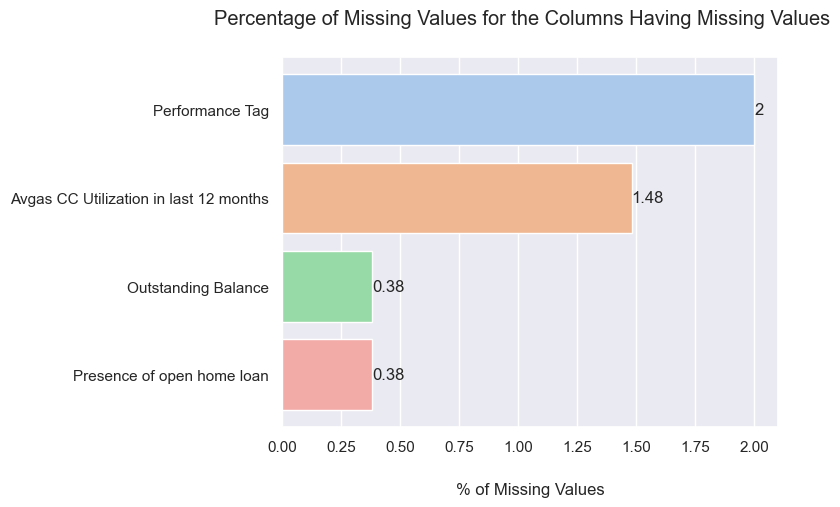

In [13]:
# plotting the missing values
plot_missing_percentage(credit_df)

<Axes: >

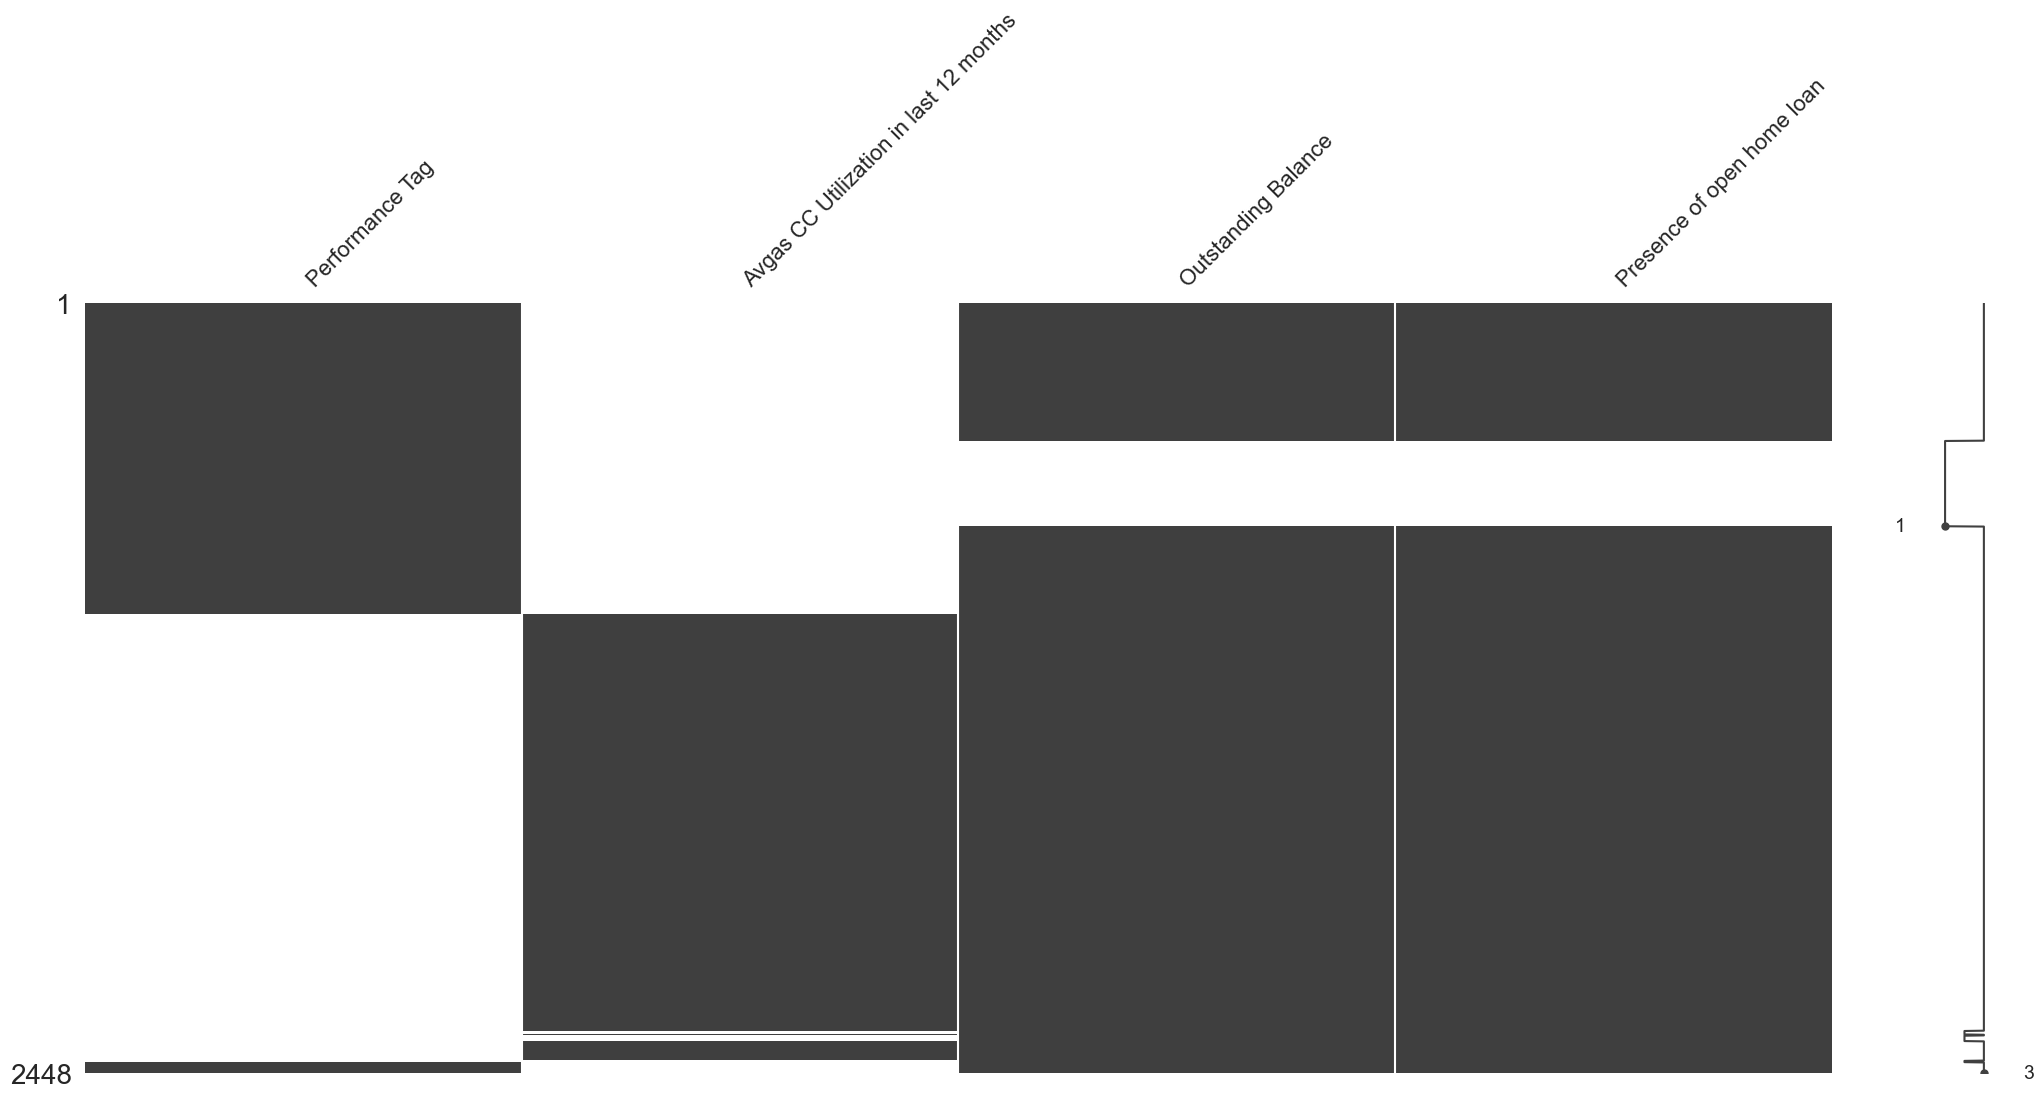

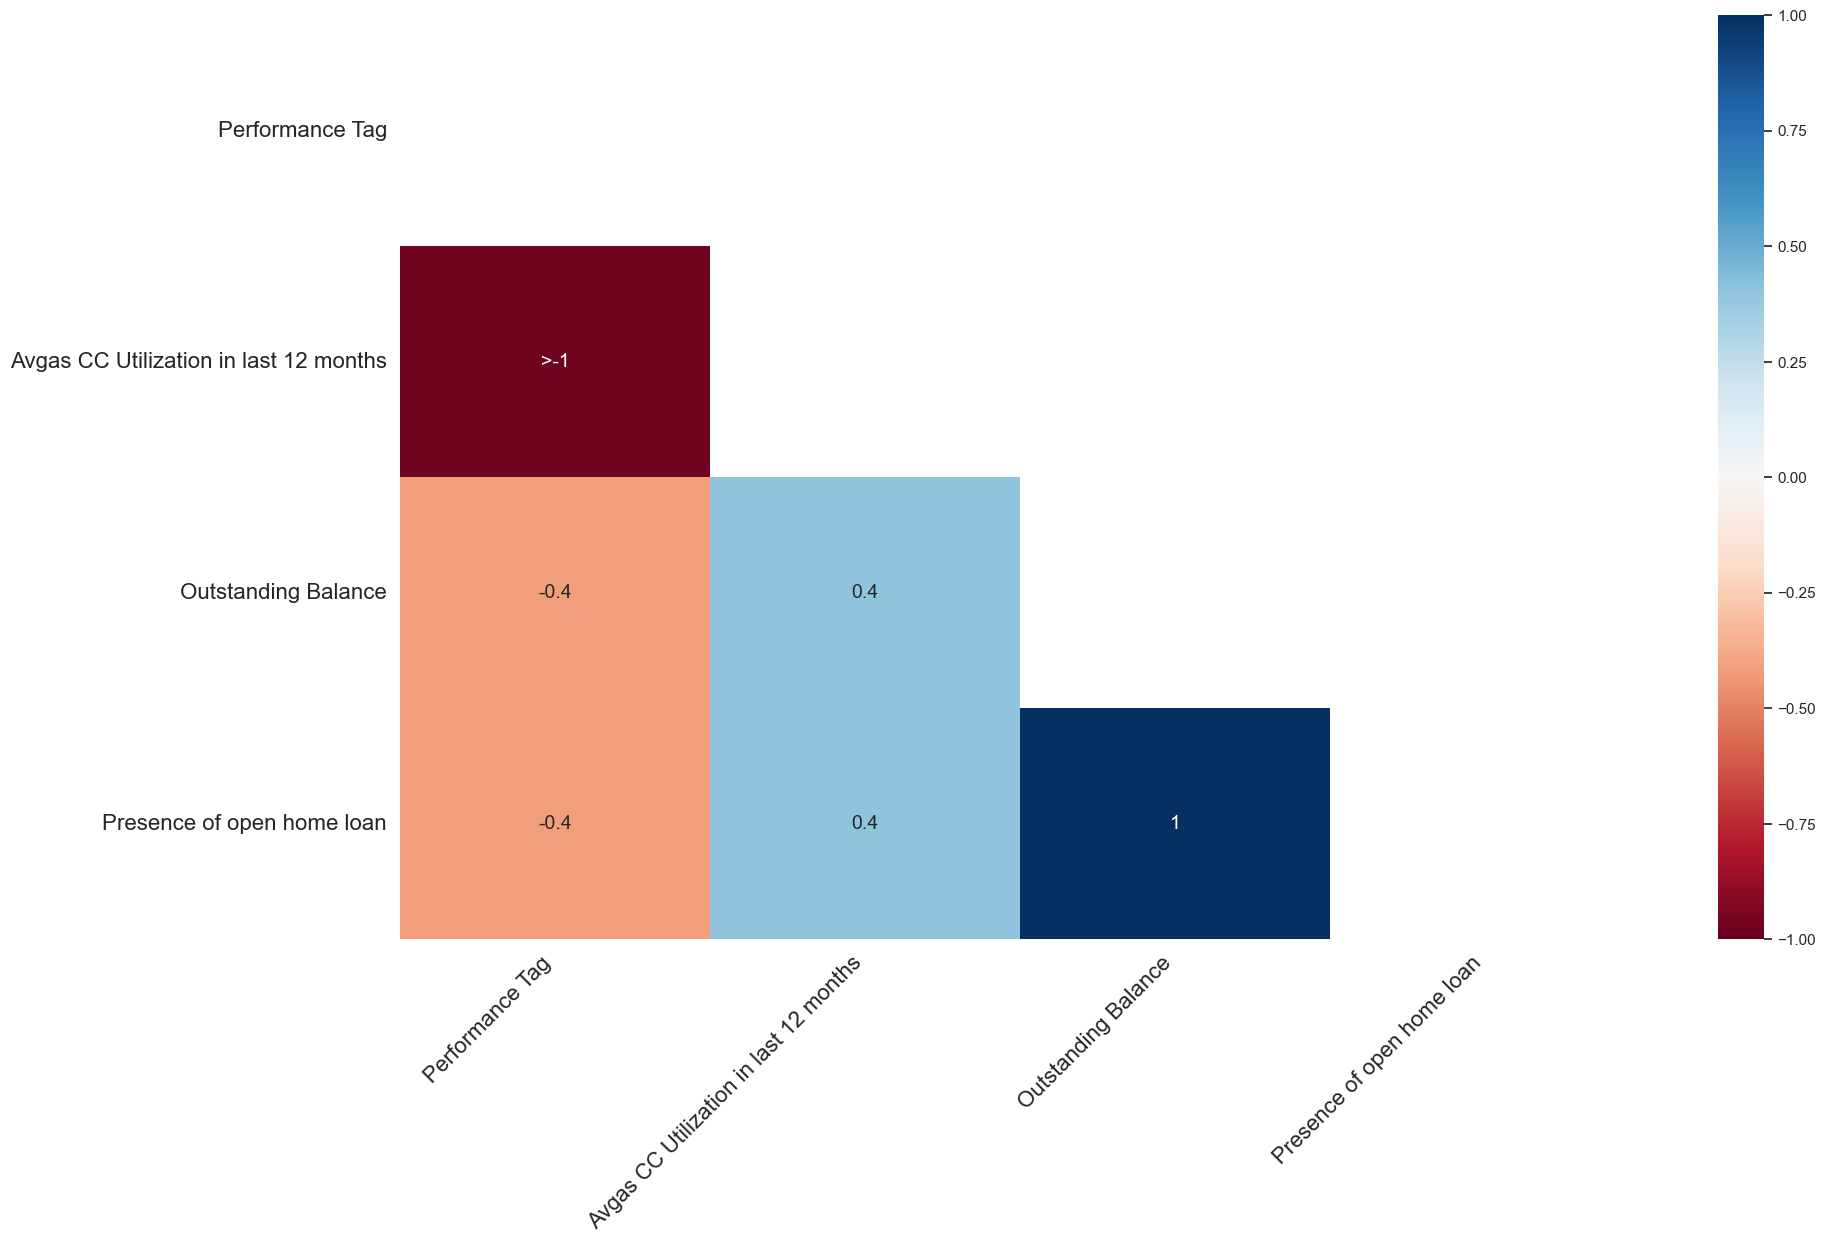

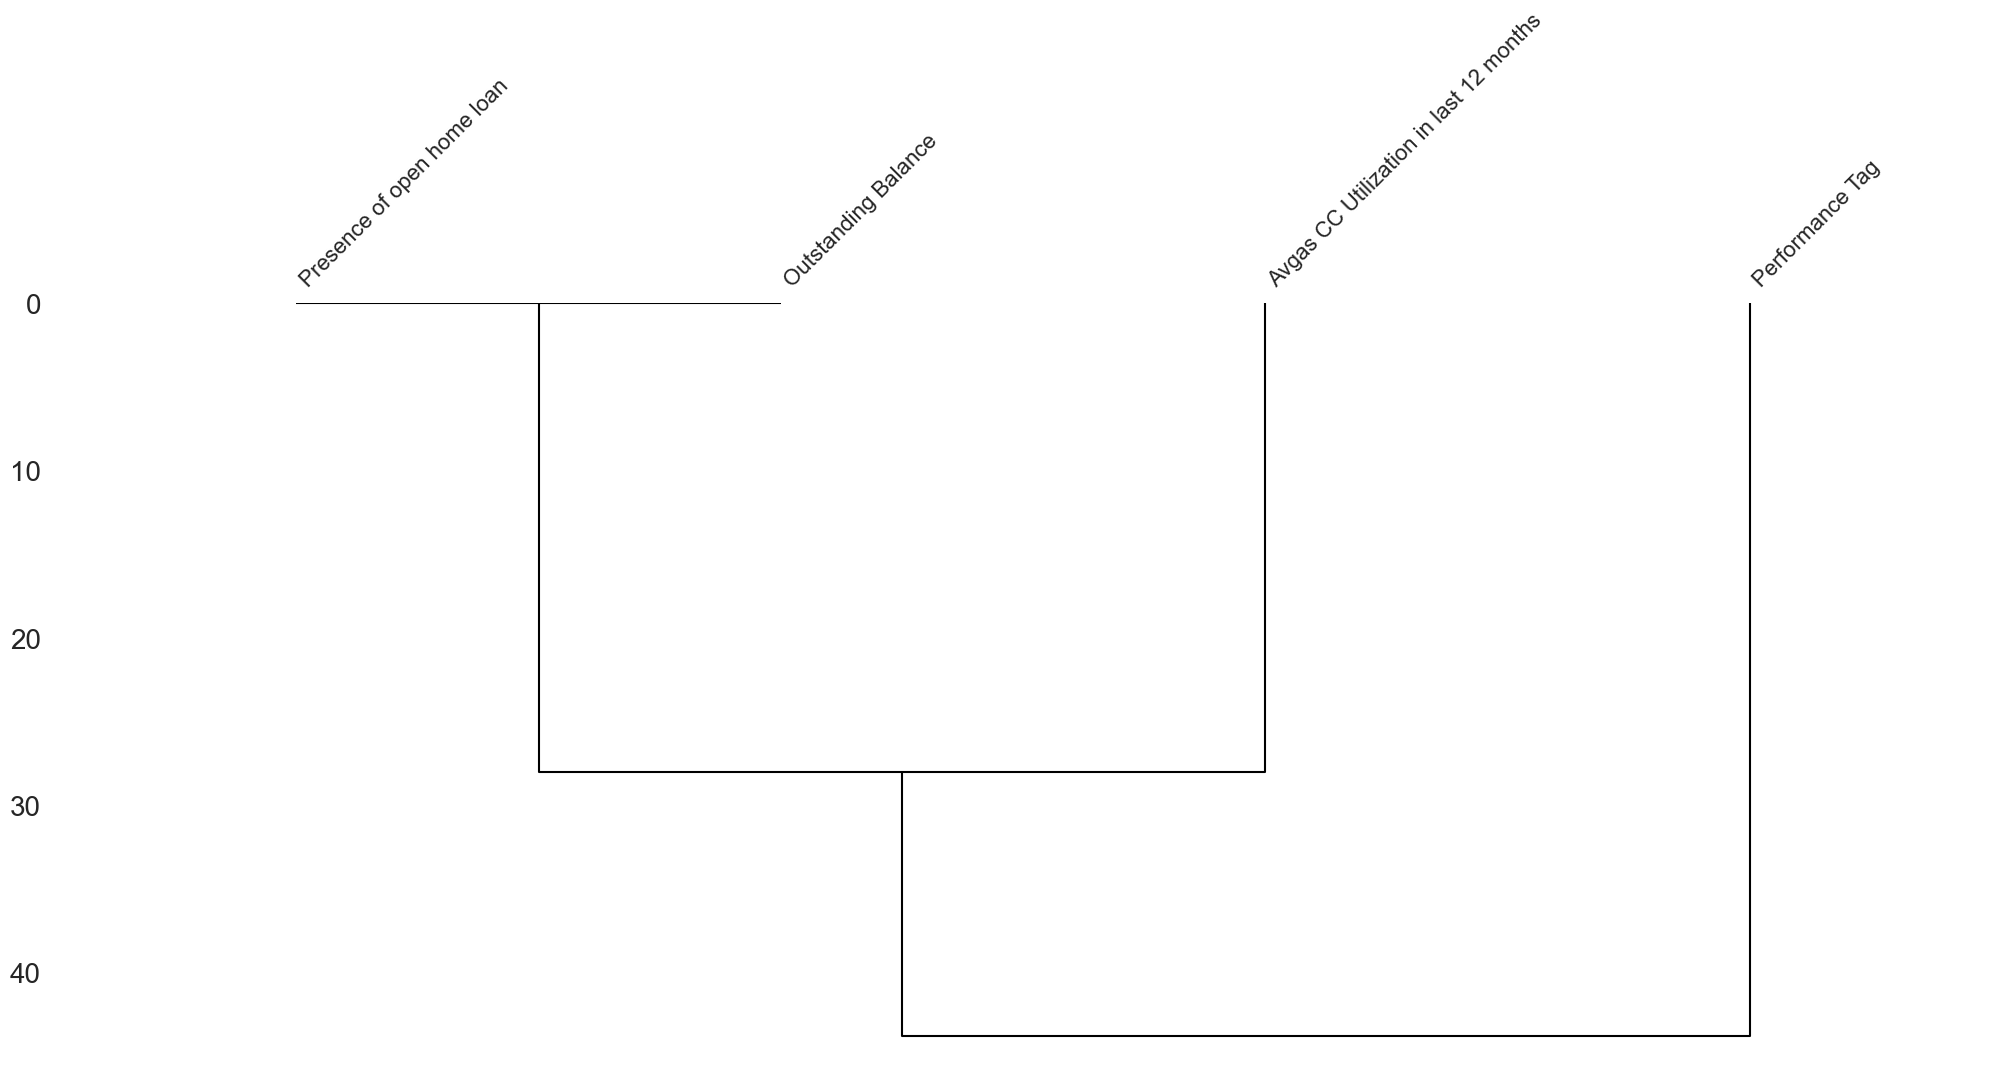

In [14]:
# filtering the data and selecting the only null value data
null_credit_data = filter_non_null_data(credit_df)

# plotting the matrix showing the null values of columns
msno.matrix(null_credit_data)

# plotting the heatmap showing correlation of columns
msno.heatmap(null_credit_data)

# plotting the dendrograph showing the tree based relationship of null values in column
msno.dendrogram(null_credit_data)